In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [2]:
data = pd.read_csv('../results/results_preprocessed.csv')

In [3]:
data.describe()

,label,mean,median,variance,standardDeviation,minValue,maxValue
count,3444.000000,3444.000000,3444.000000,3444.000000,3444.000000,3444.000000,3444.000000
mean,0.487805,255.345235,181.915766,87463.819135,277.923956,10.346906,2617.085405
std,0.499924,83.361659,71.159394,84759.580861,101.119057,20.979162,1063.385796
min,0.000000,138.513000,87.269600,19060.700000,138.060000,0.192660,754.153000
25%,0.000000,200.932500,137.950500,47329.450000,217.553500,3.211875,1872.957500
50%,0.000000,240.782000,166.726500,64300.400000,253.575500,5.293760,2408.885000
75%,1.000000,286.770250,212.542750,92593.550000,304.291500,9.078565,3162.075000
max,1.000000,776.914000,748.784000,762817.000000,873.394000,229.640000,9093.890000


In [4]:
data

,label,mean,median,variance,standardDeviation,minValue,maxValue
0,0,532.145,366.634,258299.0,508.231,39.51450,2430.31
1,0,680.128,441.130,501907.0,708.454,34.85200,3883.37
2,0,704.513,431.416,513311.0,716.457,49.10840,4291.29
3,0,237.651,152.335,80520.9,283.762,1.96109,2305.66
4,0,235.149,133.927,95543.7,309.102,2.66125,1992.91
...,...,...,...,...,...,...,...
3439,1,202.997,160.122,32146.4,179.294,5.14571,1242.49
3440,1,203.776,160.692,32647.8,180.687,8.71329,1368.30
3441,1,216.709,151.177,83416.2,288.819,2.28287,4176.86
3442,1,208.429,160.790,34608.2,186.033,2.15325,1523.46


<AxesSubplot:>

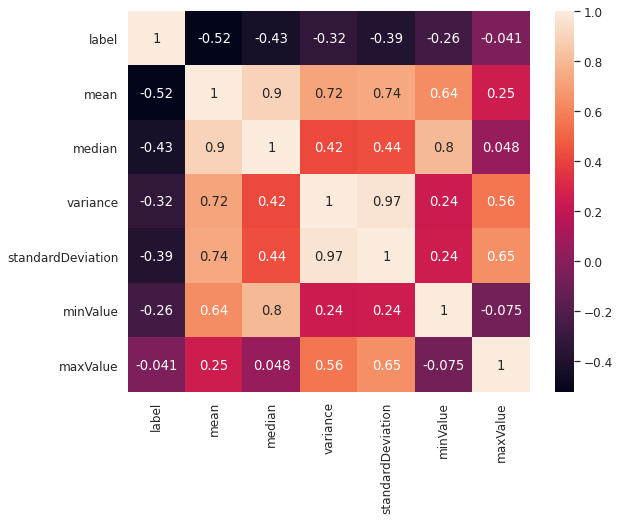

In [5]:
corr = data.corr()
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'Median')

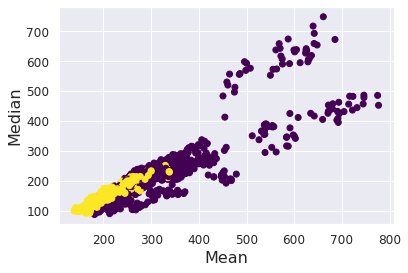

In [7]:
plt.scatter(data['mean'], data['median'], c=data['label'], cmap='viridis')
plt.xlabel('Mean', fontsize=16)
plt.ylabel('Median', fontsize=16)

Text(0, 0.5, 'Standard deviation')

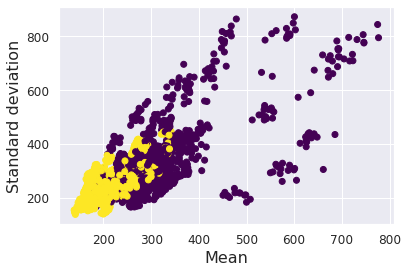

In [8]:
#plt.scatter(data['variance'], data['standardDeviation'], c=data['label'], cmap='viridis')
plt.scatter(data['mean'], data['standardDeviation'], c=data['label'], cmap='viridis')
plt.xlabel('Mean', fontsize=16)
plt.ylabel('Standard deviation', fontsize=16)

Text(0, 0.5, 'Maximum')

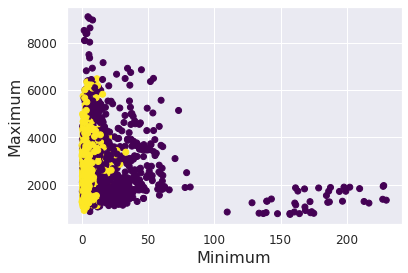

In [9]:
plt.scatter(data['minValue'], data['maxValue'], c=data['label'], cmap='viridis')
plt.xlabel('Minimum', fontsize=16)
plt.ylabel('Maximum', fontsize=16)

In [14]:
X_train, X_test, y_train, y_test = \
    train_test_split(data[['mean', 'median', 'standardDeviation', 'minValue', 'maxValue']], data['label'], test_size=.3, random_state=42)

classifier = make_pipeline(StandardScaler(), SVC())
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [15]:
y_predict = classifier.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       546
           1       0.88      0.83      0.85       488

    accuracy                           0.86      1034
   macro avg       0.86      0.86      0.86      1034
weighted avg       0.86      0.86      0.86      1034



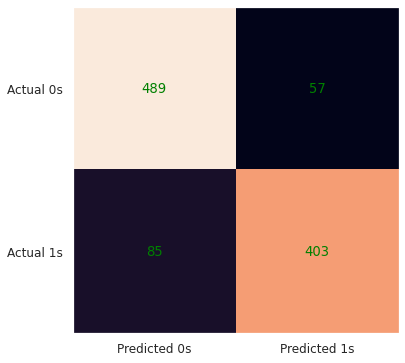

In [16]:
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='green')
plt.show()

In [44]:
# Save trained model
#joblib.dump(classifier, '../models/model_alignability_prediction.joblib')

['../models/point_cloud_comparison.joblib']